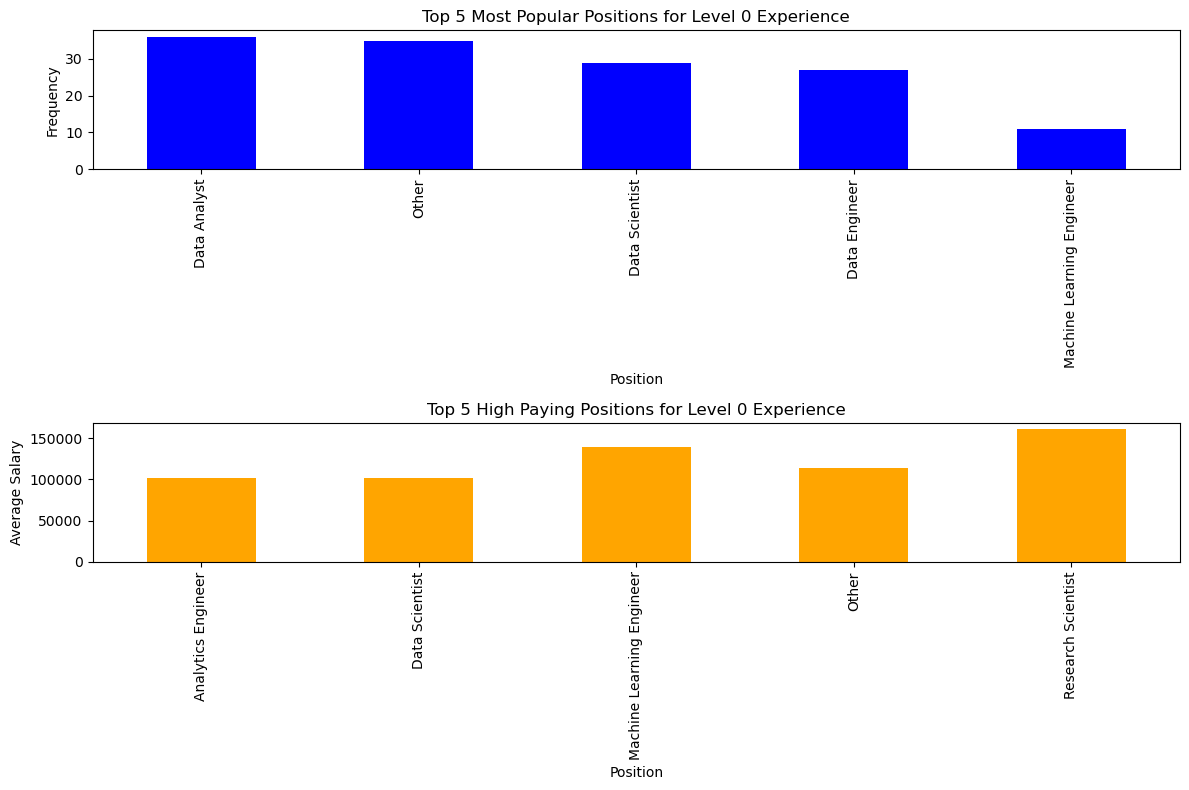

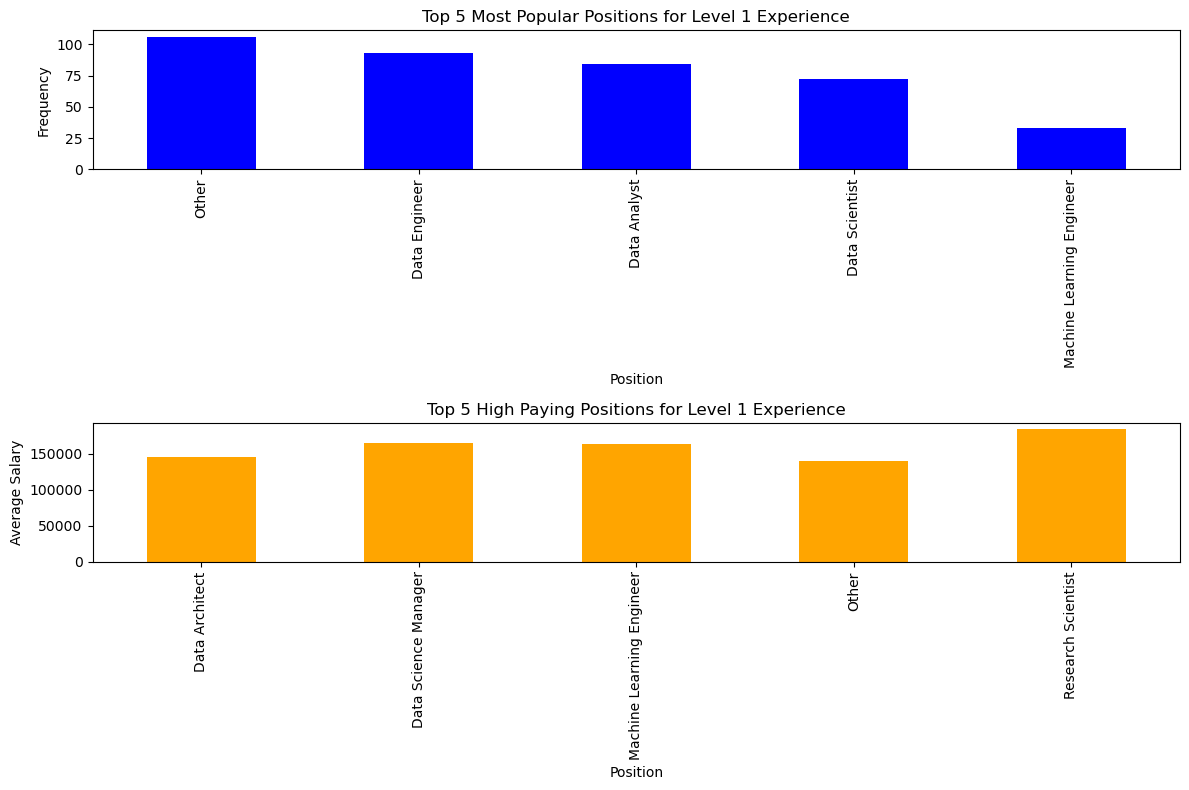

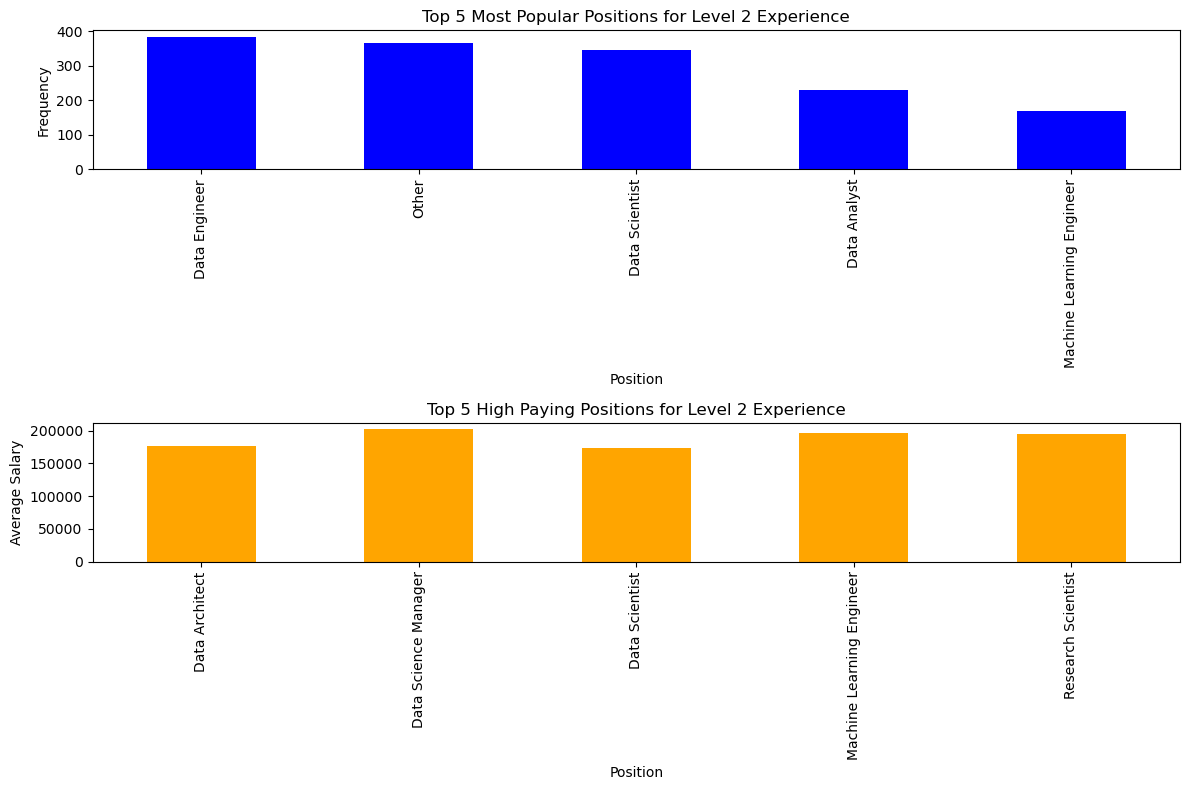

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame with the correct file path
file_path = '../Data/Converted_Data_Science_Salaries.csv'
df = pd.read_csv(file_path)

# Iterate through each unique experience level
for experience_level in range(3):  # Assuming experience levels are 0, 1, and 2
    # Filter the DataFrame for the specific experience level
    subset_df = df[df['experience_level'] == experience_level]

    # Find the top 5 most popular positions
    top_5_popular_positions = subset_df['job_title'].value_counts().nlargest(5).index

    # Find the top 5 high paying positions
    top_5_high_paying_positions = subset_df.groupby('job_title')['Salary'].mean().nlargest(5).index

    # Plot bar charts for the top 5 most popular and high paying positions
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    subset_df[subset_df['job_title'].isin(top_5_popular_positions)]['job_title'].value_counts().plot(kind='bar', color='blue')
    plt.title(f"Top 5 Most Popular Positions for Level {experience_level} Experience")
    plt.xlabel("Position")
    plt.ylabel("Frequency")

    plt.subplot(2, 1, 2)
    subset_df[subset_df['job_title'].isin(top_5_high_paying_positions)].groupby('job_title')['Salary'].mean().plot(kind='bar', color='orange')
    plt.title(f"Top 5 High Paying Positions for Level {experience_level} Experience")
    plt.xlabel("Position")
    plt.ylabel("Average Salary")

    plt.tight_layout()
    plt.show()


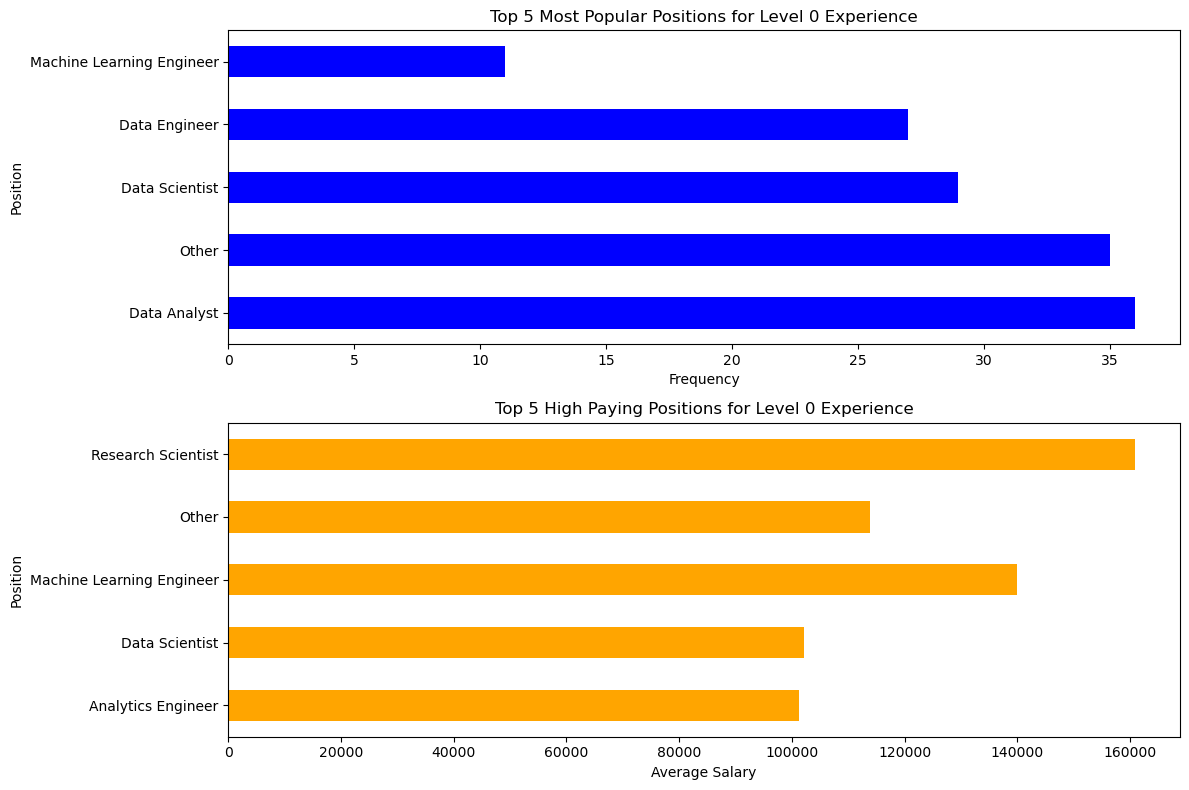

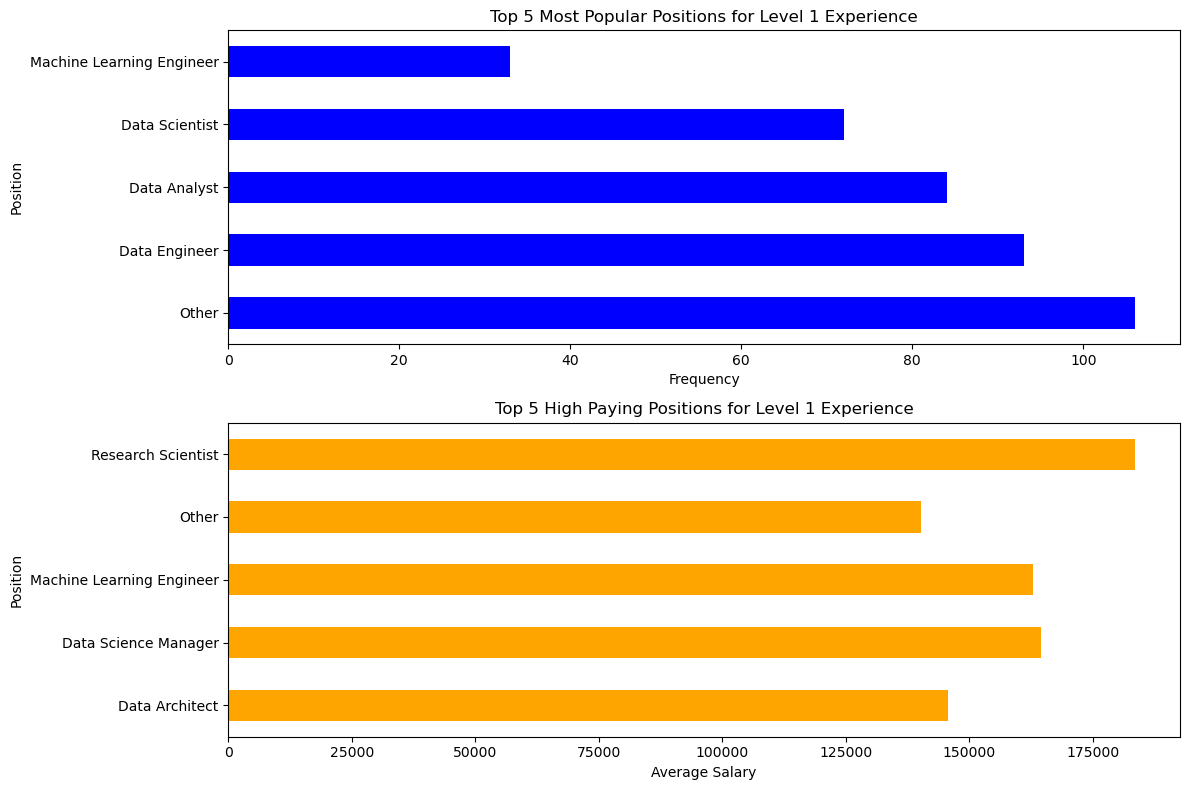

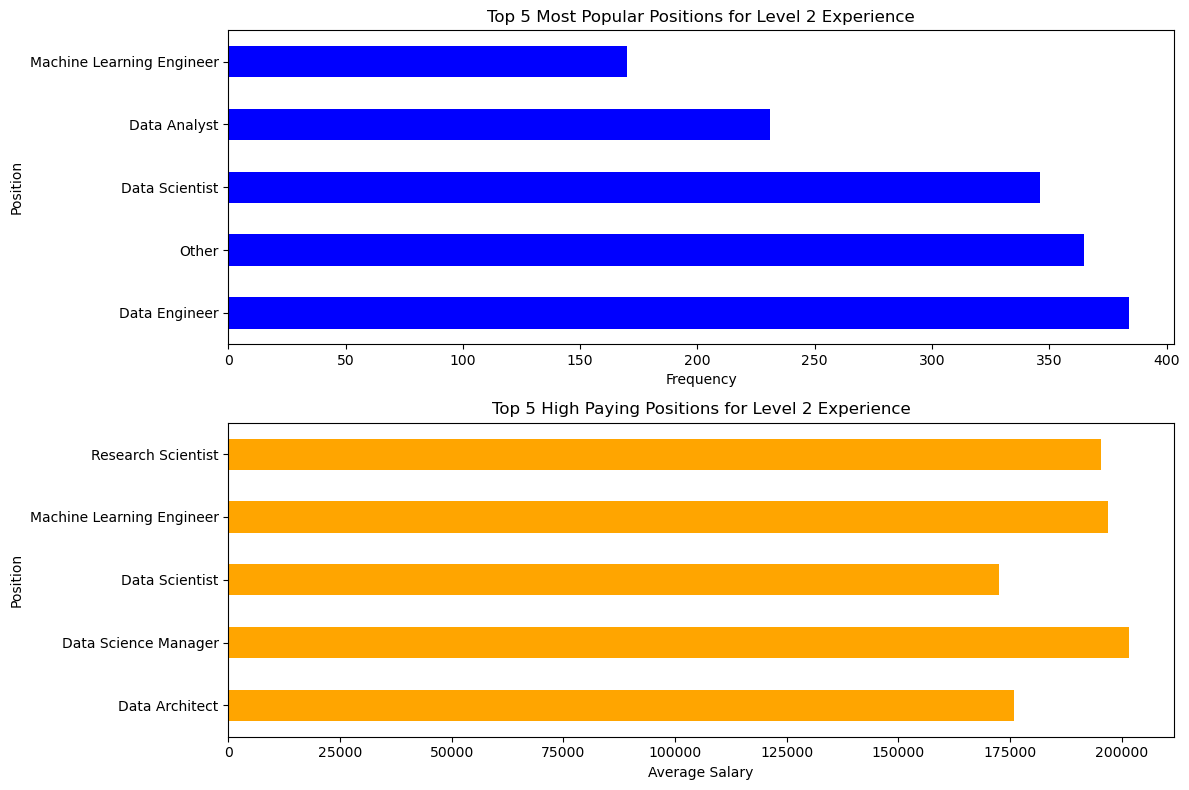

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame with the correct file path
file_path = '../Data/Converted_Data_Science_Salaries.csv'
df = pd.read_csv(file_path)

# Iterate through each unique experience level
for experience_level in range(3):  # Assuming experience levels are 0, 1, and 2
    # Filter the DataFrame for the specific experience level
    subset_df = df[df['experience_level'] == experience_level]

    # Find the top 5 most popular positions
    top_5_popular_positions = subset_df['job_title'].value_counts().nlargest(5).index

    # Find the top 5 high paying positions
    top_5_high_paying_positions = subset_df.groupby('job_title')['Salary'].mean().nlargest(5).index

    # Plot bar charts for the top 5 most popular and high paying positions with x and y values swapped
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    subset_df[subset_df['job_title'].isin(top_5_popular_positions)]['job_title'].value_counts().plot(kind='barh', color='blue')
    plt.title(f"Top 5 Most Popular Positions for Level {experience_level} Experience")
    plt.xlabel("Frequency")
    plt.ylabel("Position")

    plt.subplot(2, 1, 2)
    subset_df[subset_df['job_title'].isin(top_5_high_paying_positions)].groupby('job_title')['Salary'].mean().plot(kind='barh', color='orange')
    plt.title(f"Top 5 High Paying Positions for Level {experience_level} Experience")
    plt.xlabel("Average Salary")
    plt.ylabel("Position")

    plt.tight_layout()
    plt.show()


Training Data Score: 1.0
Testing Data Score: 0.9736842105263158
   Prediction  Actual
0           1       1
1           0       0
2           0       0
3           0       0
4           1       1
5           0       0
6           1       1
7           1       1
8           0       0
9           0       0


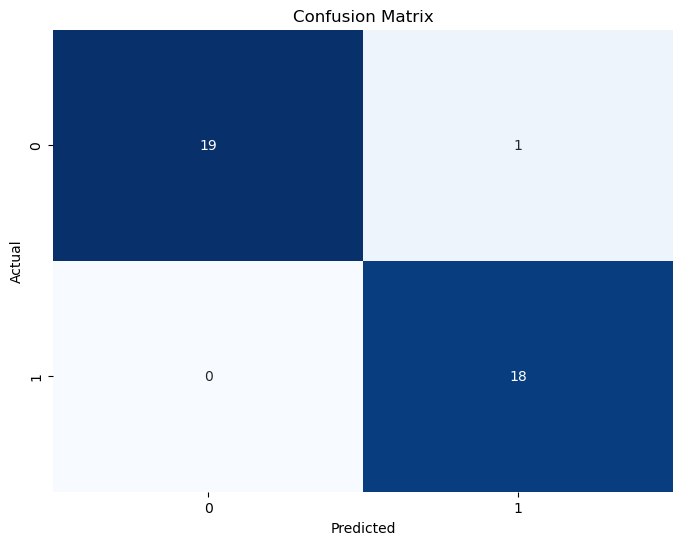

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.97        18

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



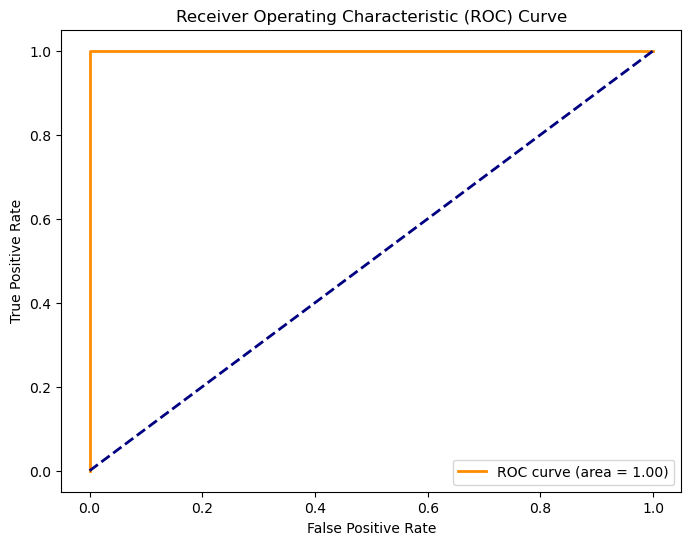

In [26]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(Path("../Data/Clean_Data_Science_Salaries.csv"))

# Rename columns
df = df.rename(columns={"Job Title": "job_title", 
                   "Experience Level": "experience_level",
                   "Company Location": 'company_location', 
                   "Company Size": "company_size"})

# Binarize Salary columns
df['over_100K'] = (df['Salary'] >= 100000).astype(int)
df['over_150K'] = (df['Salary'] >= 150000).astype(int)

# Map experience levels to numerical values
df['experience_level'] = df['experience_level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2, 'Executive': 3})

# Map company sizes to numerical values
df['company_size'] = df['company_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

# Replace job titles with less than 50 instances with 'Other'
job_title_counts = df['job_title'].value_counts()
titles_to_replace = job_title_counts[job_title_counts < 50].index
df['job_title'] = df['job_title'].replace(titles_to_replace, "Other")

# Filter to only experience level = 0 (Entry)
df_entry = df[(df['experience_level'] == 0)]

# Create dummy columns for categorical columns
df_dummies = pd.get_dummies(df_entry, columns=['job_title', 'company_location'])

# Split the data into features (X) and target (y)
y = df_dummies["over_100K"]
X = df_dummies.drop(columns=["over_100K", "over_150K"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Train the logistic regression model
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
classifier.fit(X_train, y_train)

# Display model performance
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# Predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
print(results.head(10))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Data Score: 0.8630717682586975
Testing Data Score: 0.8094333193380928
      Prediction  Actual
0   71013.948367   60000
1  190575.581122  189750
2  109832.518751  110000
3   61482.878898   50000
4   70365.119637   55000
5  178198.382777  160000
6   73793.546998   70000
7   70276.073874   85000
8  113260.946112  130001
9   76808.514232   86000


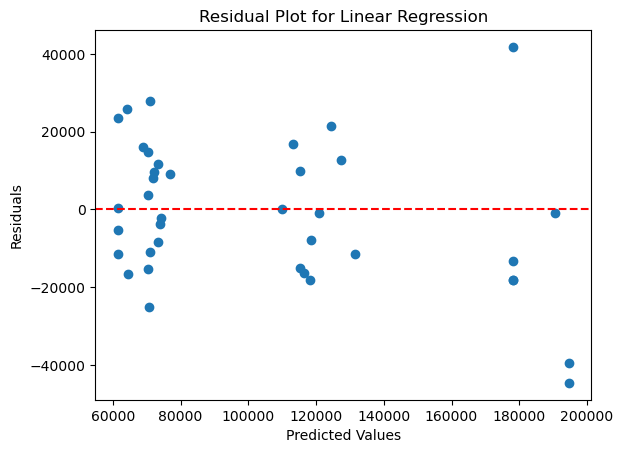

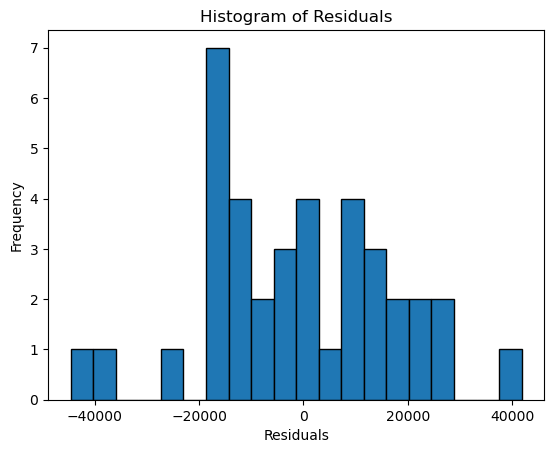

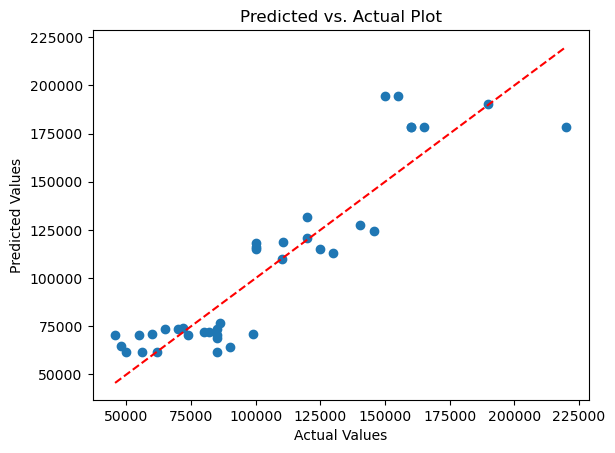

In [27]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv(Path("../Data/Clean_Data_Science_Salaries.csv"))

# Rename columns
df = df.rename(columns={"Job Title": "job_title", 
                   "Experience Level": "experience_level",
                   "Company Location": 'company_location', 
                   "Company Size": "company_size"})

# Binarize Salary columns
df['over_100K'] = (df['Salary'] >= 100000).astype(int)
df['over_150K'] = (df['Salary'] >= 150000).astype(int)

# Map experience levels to numerical values
df['experience_level'] = df['experience_level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2, 'Executive': 3})

# Map company sizes to numerical values
df['company_size'] = df['company_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

# Replace job titles with less than 50 instances with 'Other'
job_title_counts = df['job_title'].value_counts()
titles_to_replace = job_title_counts[job_title_counts < 50].index
df['job_title'] = df['job_title'].replace(titles_to_replace, "Other")

# Filter to only experience level = 0 (Entry)
df_entry = df[(df['experience_level'] == 0)]

# Create dummy columns for categorical columns
df_dummies = pd.get_dummies(df_entry, columns=['job_title', 'company_location'])

# Split the data into features (X) and target (y)
y = df_dummies["Salary"]
X = df_dummies.drop(columns=["Salary"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model performance
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

# Predictions
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
print(results.head(10))

# Residual Plot
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

# Histogram of Residuals
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Predicted vs. Actual Plot
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot')
plt.show()


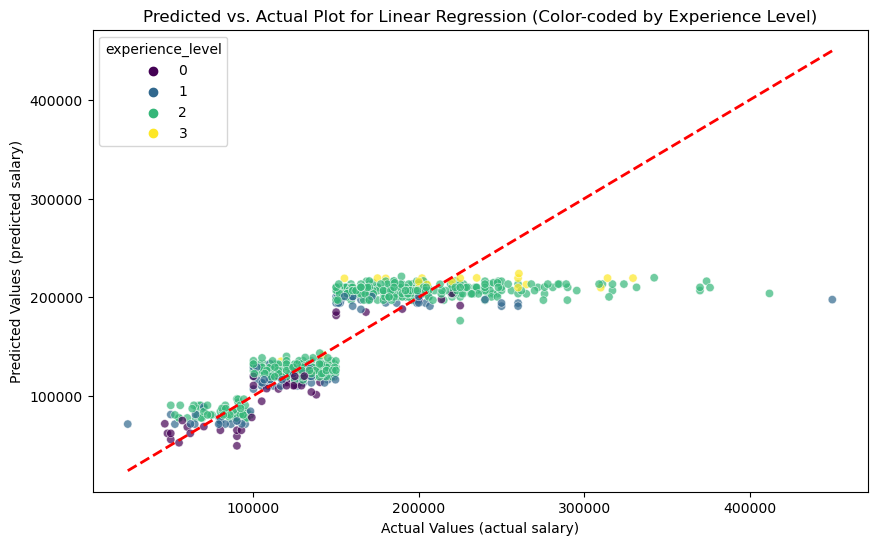

In [30]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv(Path("../Data/Clean_Data_Science_Salaries.csv"))

# Rename columns
df = df.rename(columns={"Job Title": "job_title", 
                   "Experience Level": "experience_level",
                   "Company Location": 'company_location', 
                   "Company Size": "company_size"})

# Binarize Salary columns
df['over_100K'] = (df['Salary'] >= 100000).astype(int)
df['over_150K'] = (df['Salary'] >= 150000).astype(int)

# Map experience levels to numerical values
df['experience_level'] = df['experience_level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2, 'Executive': 3})

# Map company sizes to numerical values
df['company_size'] = df['company_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

# Replace job titles with less than 50 instances with 'Other'
job_title_counts = df['job_title'].value_counts()
titles_to_replace = job_title_counts[job_title_counts < 50].index
df['job_title'] = df['job_title'].replace(titles_to_replace, "Other")

# Create dummy columns for categorical columns
df_dummies = pd.get_dummies(df, columns=['job_title', 'company_location'])

# Split the data into features (X) and target (y)
y = df_dummies["Salary"]
X = df_dummies.drop(columns=["Salary"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Add a new column for color-coding by experience level
df_test = df.loc[y_test.index]
df_test['predictions'] = predictions

# Scatter Plot with color-coding for experience levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='predictions', hue='experience_level', data=df_test, palette='viridis', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values (actual salary)')
plt.ylabel('Predicted Values (predicted salary)')
plt.title('Predicted vs. Actual Plot for Linear Regression (Color-coded by Experience Level)')
plt.show()
